In [1]:
import pandas as pd
import numpy as np
from pkg.scenario import *

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

%load_ext lab_black

In [3]:
parameters = Parameters(
    protocol=ProtocolParams(
        exit_fee=100,
        entry_fee=100,
        frate_to_LA=100,
        frate_to_IF=100,
        IF_exposure_init=100,
        take_profit_chance=100,
        take_loss_chance=100,
    ),
    LA=LeverageAgentParams(
        num_LA_positions_per_period=100,
        position_size_gamma_params=(3, 1000),
        poisson=10,
    ),
    stochastic=StochasticProcessParams(s0=10, mu=10, sigma=10, dt=10,),
)

In [4]:
result = create_scenario(parameters)

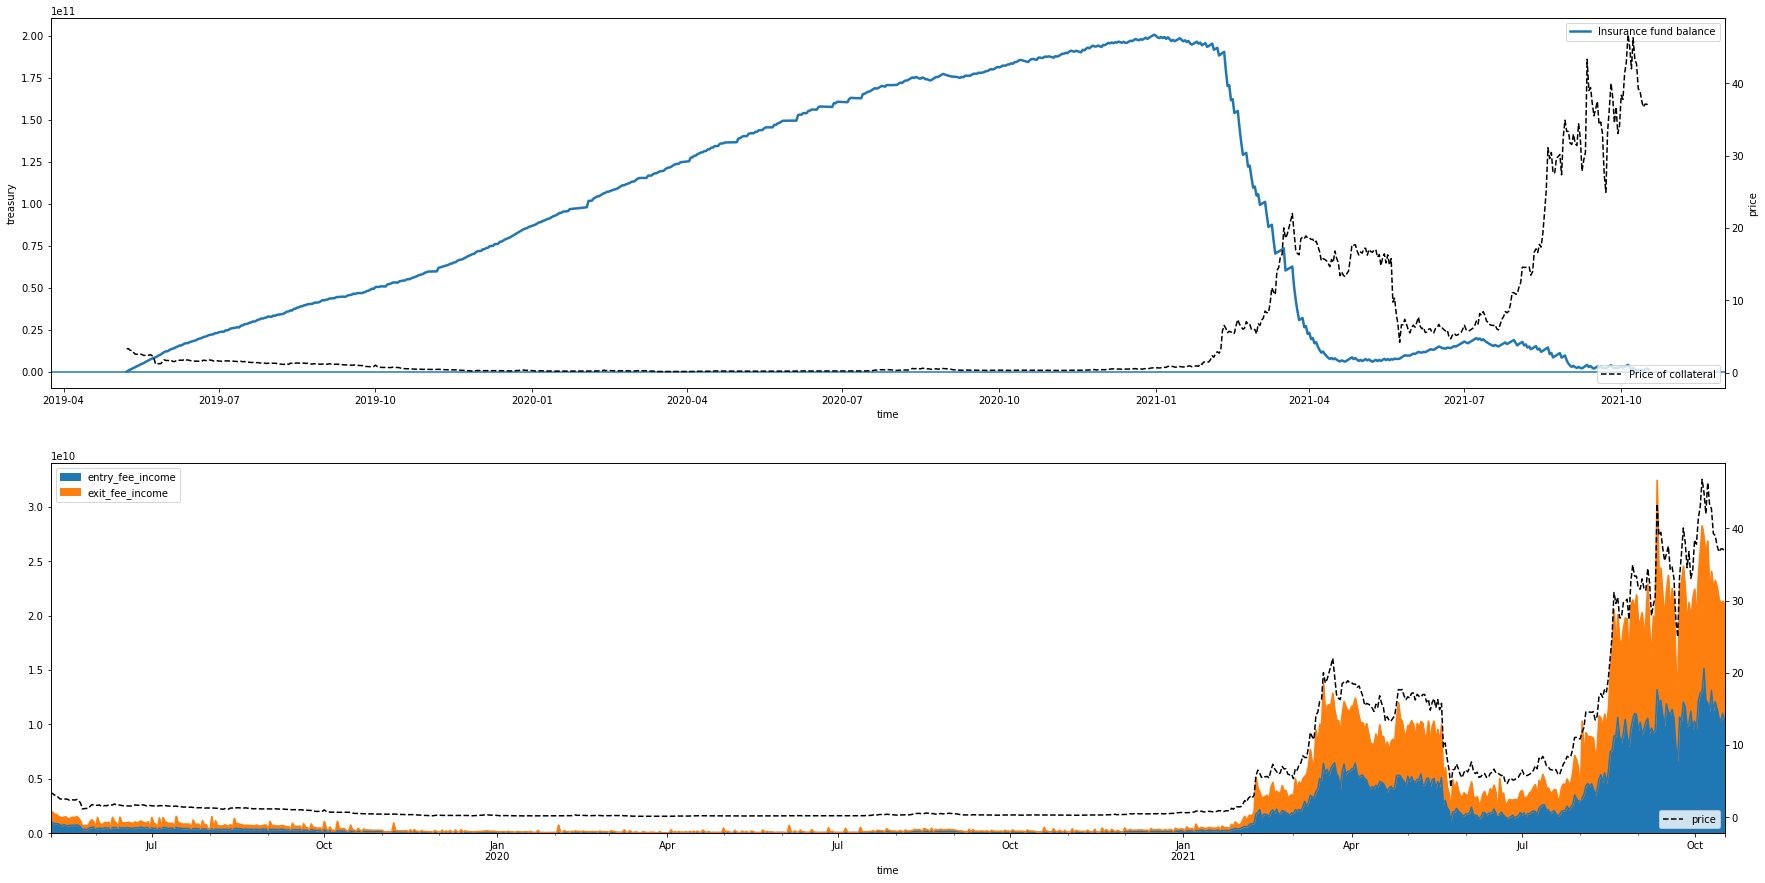

In [5]:
result = create_scenario(parameters)
fig, axs = plt.subplots(2, 1, figsize=(30, 15))

ax = axs[0]
sns.lineplot(
    data=result,
    x="time",
    y="treasury",
    ax=ax,
    palette="Blues",
    linewidth=2.5,
    label="Insurance fund balance",
)
# ax.set_ylim(0, result["total_amt"].max())
ax.axhline(0)
ax2 = ax.twinx()
sns.lineplot(
    data=result[["time", "price"]],
    x="time",
    y="price",
    ax=ax2,
    color="black",
    label="Price of collateral",
)
ax2.lines[0].set_linestyle("--")
ax2.legend(loc=4)

ax3 = axs[1]

result.set_index("time")[
    [
        # "funding_rate_payout",
        # "funding_rate_income",
        "entry_fee_income",
        "exit_fee_income",
    ]
].plot.area(stacked=True, ax=ax3)


ax4 = ax3.twinx()

result.set_index("time").price.plot.line(
    ax=ax4, color="black", label="price", linestyle="--"
)

# ax4.lines[0].set_linestyle("--")
ax4.legend(loc=4)

In [11]:
results

NameError: name 'results' is not defined

In [14]:
!pip install dash --quiet

In [22]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from plotly.express.colors import sequential
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [33]:
import plotly.express as px

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=result.time, y=result.treasury, name="Insurance fund"))
fig.add_trace(
    go.Scatter(x=result.time, y=result.price, name="Luna price"), secondary_y=True
)
fig.show()

fig = make_subplots(specs=[[{"secondary_y": True}]])


In [ ]:

ax = axs[0]
sns.lineplot(
    data=result,
    x="time",
    y="treasury",
    ax=ax,
    palette="Blues",
    linewidth=2.5,
    label="Insurance fund balance",
)
# ax.set_ylim(0, result["total_amt"].max())
ax.axhline(0)
ax2 = ax.twinx()
sns.lineplot(
    data=result[["time", "price"]],
    x="time",
    y="price",
    ax=ax2,
    color="black",
    label="Price of collateral",
)
ax2.lines[0].set_linestyle("--")
ax2.legend(loc=4)


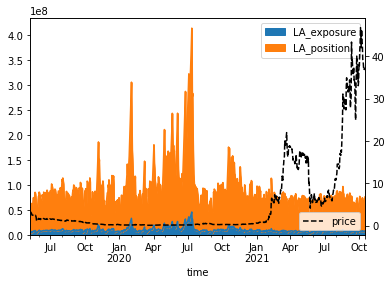

In [10]:
fig, ax3 = plt.subplots(1, 1)

result.set_index("time")[["LA_exposure", "LA_position"]].plot.area(stacked=True, ax=ax3)

ax4 = ax3.twinx()

result.set_index("time").price.plot.line(
    ax=ax4, color="black", label="price", linestyle="--"
)

# ax4.lines[0].set_linestyle("--")
ax4.legend(loc=4)

# Monte carlo

In [ ]:
result = pd.concat([future.result()["treasury"] for future in futures] + [futures[0].result()["time"]], axis=1)
result.columns =  list(range(result.shape[1]-1)) + [result.columns[-1]]

plt.figure(figsize=(20,10))
sns.lineplot(data=pd.melt(result, id_vars="time", value_vars = range(result.shape[1]-1)), x="time", y="value", hue="variable", alpha=.3)

In [4]:
import concurrent.futures
import multiprocessing

In [5]:
executor = concurrent.futures.ProcessPoolExecutor(10)
futures = [executor.submit(create_scenario, parameters) for _ in range(1000)]
concurrent.futures.wait(futures)
_

DoneAndNotDoneFutures(done={<Future at 0x7fb4a81d0070 state=finished returned DataFrame>, <Future at 0x7fb4a81e0070 state=finished returned DataFrame>, <Future at 0x7fb4bb7e8100 state=finished returned DataFrame>, <Future at 0x7fb4c8038100 state=finished returned DataFrame>, <Future at 0x7fb4a8238100 state=finished returned DataFrame>, <Future at 0x7fb4d8670100 state=finished returned DataFrame>, <Future at 0x7fb4bb900100 state=finished returned DataFrame>, <Future at 0x7fb4bb910100 state=finished returned DataFrame>, <Future at 0x7fb4a81d0190 state=finished returned DataFrame>, <Future at 0x7fb4a81e0190 state=finished returned DataFrame>, <Future at 0x7fb4bb7e8220 state=finished returned DataFrame>, <Future at 0x7fb4c8038220 state=finished returned DataFrame>, <Future at 0x7fb4a8238220 state=finished returned DataFrame>, <Future at 0x7fb4d8670220 state=finished returned DataFrame>, <Future at 0x7fb4bb900220 state=finished returned DataFrame>, <Future at 0x7fb4bb910220 state=finished r

<AxesSubplot:xlabel='time', ylabel='value'>

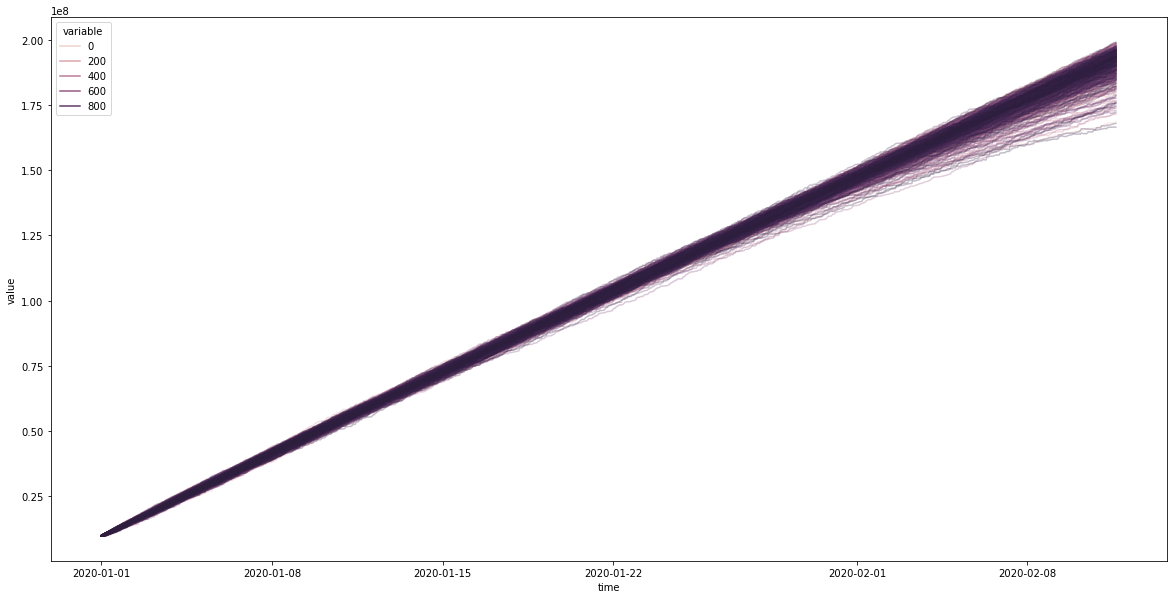

In [8]:
result = pd.concat([future.result()["treasury"] for future in futures] + [futures[0].result()["time"]], axis=1)
result.columns =  list(range(result.shape[1]-1)) + [result.columns[-1]]

plt.figure(figsize=(20,10))
sns.lineplot(data=pd.melt(result, id_vars="time", value_vars = range(result.shape[1]-1)), x="time", y="value", hue="variable", alpha=.3)

<AxesSubplot:xlabel='time', ylabel='value'>

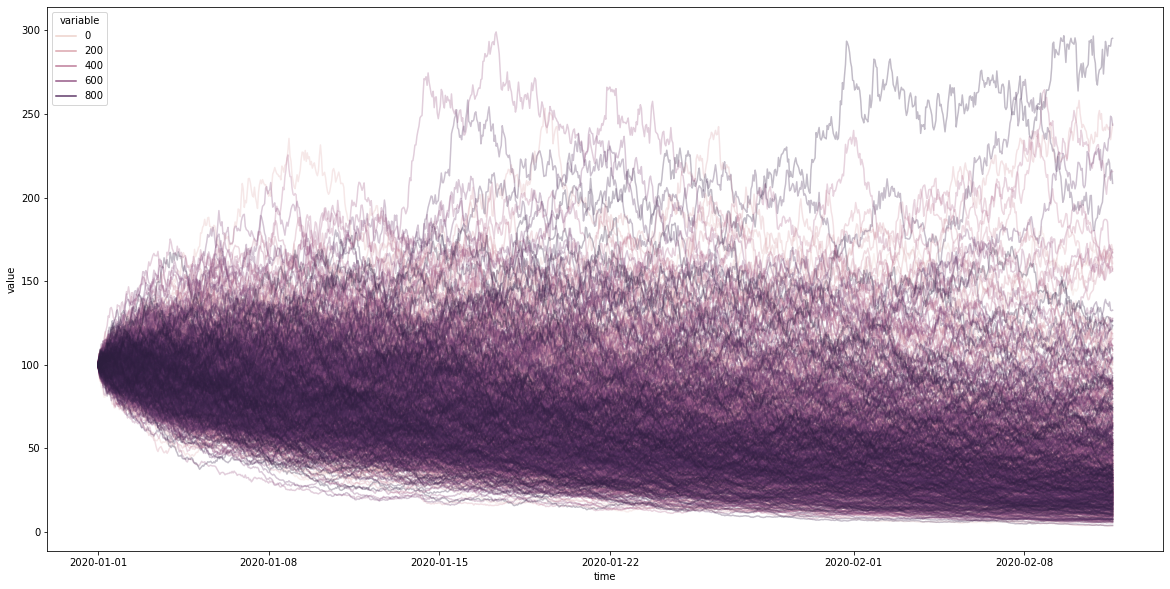

In [9]:
result = pd.concat([future.result()["price"] for future in futures] + [futures[0].result()["time"]], axis=1)
result.columns =  list(range(result.shape[1]-1)) + [result.columns[-1]]

plt.figure(figsize=(20,10))
sns.lineplot(data=pd.melt(result, id_vars="time", value_vars = range(result.shape[1]-1)), x="time", y="value", hue="variable", alpha=.3)

In [ ]:
df = create_scenario()
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(
    data=df[["time", "treasury"]],
    x="time",
    y="treasury",
    ax=ax,
    palette="Blues",
    linewidth=2.5,
)

ax2 = ax.twinx()
sns.lineplot(
    data=df[["time", "price"]],
    x="time",
    y="price",
    ax=ax2,
    color="black",
    label="Collateral price",
)
ax2.lines[0].set_linestyle("--")
ax2.legend(loc=4)